In [ ]:
!wget https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

--2022-02-07 07:34:56--  https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg
Resolving sovzond.ru (sovzond.ru)... 62.213.94.106
Connecting to sovzond.ru (sovzond.ru)|62.213.94.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 459534 (449K) [image/jpeg]
Saving to: ‘Исходный-аэрофотоснимок.jpg’

Исходный-аэрофотосн 100%[===================>] 448.76K   142KB/s    in 3.1s    

2022-02-07 07:35:01 (142 KB/s) - ‘Исходный-аэрофотоснимок.jpg’ saved [459534/459534]



In [ ]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
IMG_PATH = 'Исходный-аэрофотоснимок.jpg'

# Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [ ]:
img = cv2.imread(IMG_PATH)

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

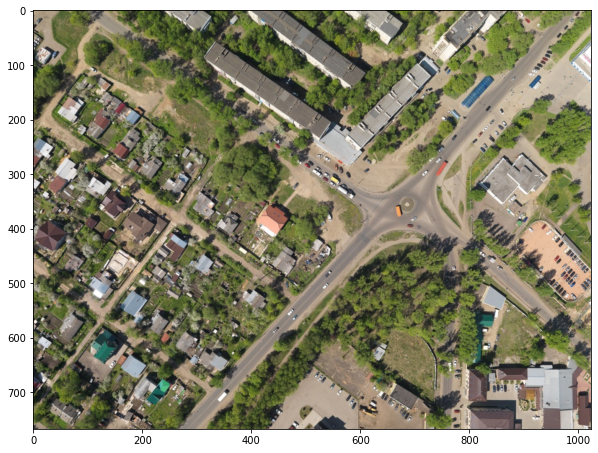

In [ ]:
plt.figure(figsize=[10, 10])
plt.imshow(img_rgb)

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

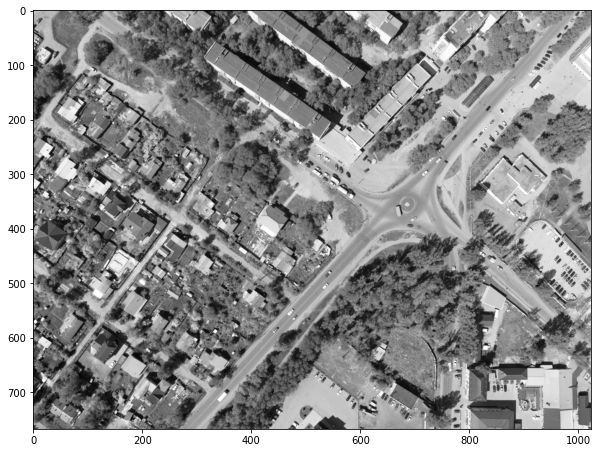

In [ ]:
plt.figure(figsize=[10, 10])
plt.imshow(img_gray, cmap='Greys_r')

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [ ]:
img_gray = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)

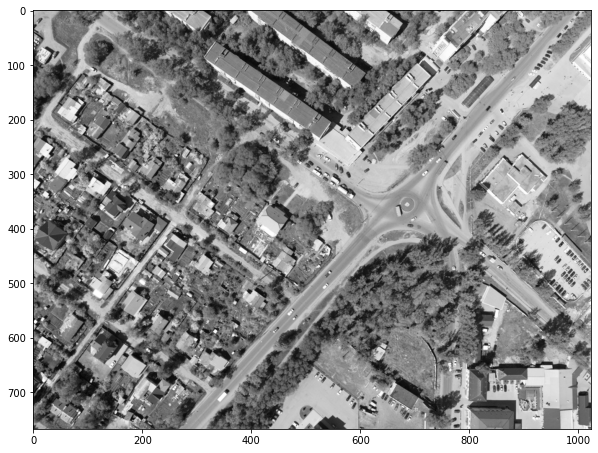

In [ ]:
plt.figure(figsize=[10, 10])
plt.imshow(img_gray, cmap='Greys_r')

серое изображение - двумерный массив:

In [ ]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (768, 1024)
img_gray.dtype =  uint8


## Упражнение 1 RGB -> gray

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [ ]:
def convert_rgb_to_grayscale(img_rgb):
    # your code here

In [ ]:
assert((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)).all())

## Вопрос 1
Почему бы не использовать при преобразовании в серое просто среднее арифметическое?

**Ответ:**

Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

### RGB $\to$ HSV

In [ ]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

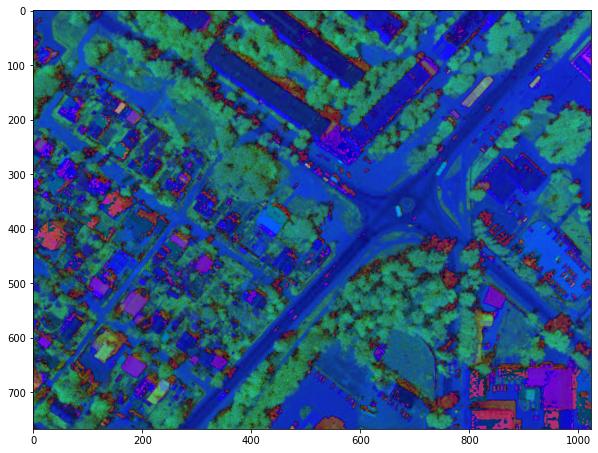

In [ ]:
plt.figure(figsize=[10, 10])
plt.imshow(img_hsv)

### RGB $\to$ YUV

In [ ]:
img_yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)

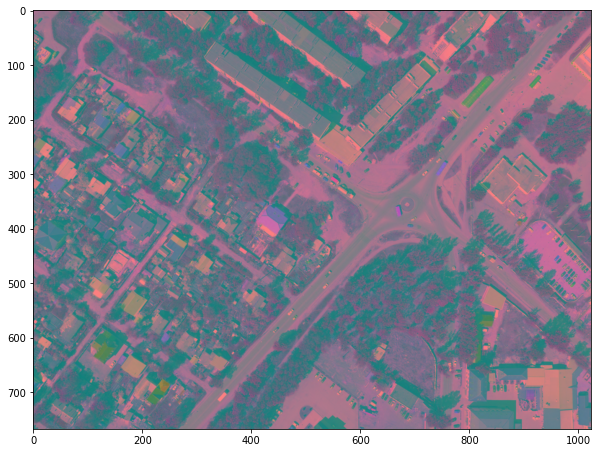

In [ ]:
plt.figure(figsize=[10, 10])
plt.imshow(img_yuv)

## Упражнение 2
Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

## Упражнение 3 RGB $\to$ HSV

Реализуйте самостоятельно конвертацию из RGB в HSV и сравните её с реализацией в OpenCV.


In [ ]:
def rgb_to_hsv(img_rgb):
    # your code here

In [ ]:
assert((rgb_to_hsv(img_rgb) == cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)).all())

## Вопрос 3

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:**

# Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v] 
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визализировать гистограмму:

In [ ]:
def visualize_hist(hist):
    plt.figure(figsize=[20, 5])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [ ]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [ ]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

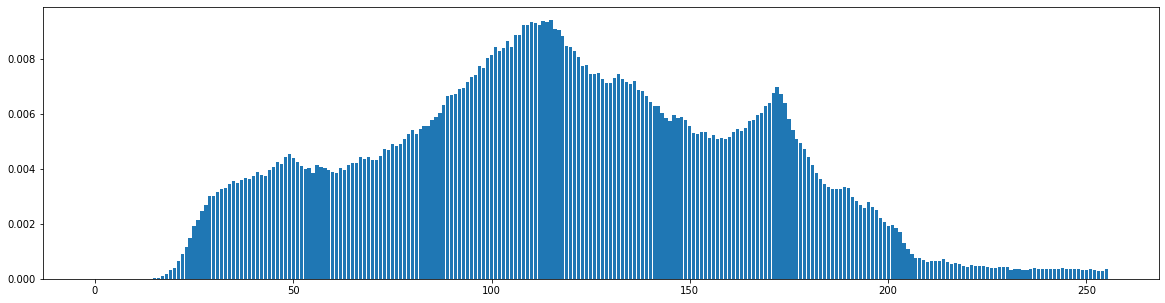

In [ ]:
visualize_hist(hist_cv)

## Упражнение 3 Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения.

In [ ]:
def compute_hist(img):
    # your code here

In [ ]:
hist_my = compute_hist(img_gray)

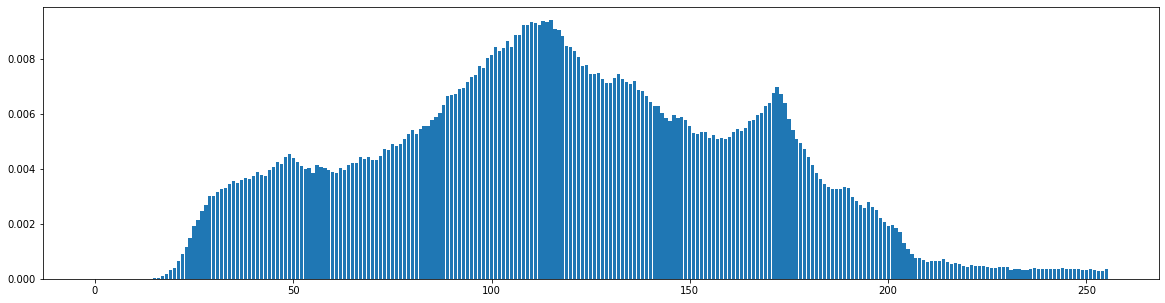

In [ ]:
visualize_hist(hist_my)

In [ ]:
assert((hist_my == hist_cv).all())

 ## Вопрос 4

 Что можно сказать об изображении по его гистограмме?

**Ответ:**

## Вопрос 5

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени?

## Упражнение 4 JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

## Упражнение 5 Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

Подсказка: вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

## Упражнение Интегральное изображение
Напомним, что интегральным изображением называется следующая функция:
$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$
С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

In [ ]:
class IntegralImage:

    def __init__(self, img):
        assert(len(img.shape) == 2)  # только для серых изображений

        self.img = img

        # your code here

    def sum(self, x, y, w, h):
        # your code here


In [ ]:
I = IntegralImage(img_gray)

In [ ]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

## Вопрос 6

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:**

## Вопрос 7

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:**